Training MSE with Gradient Descent: 0.00442944774043531
Test MSE with Gradient Descent: 0.01688923179183945


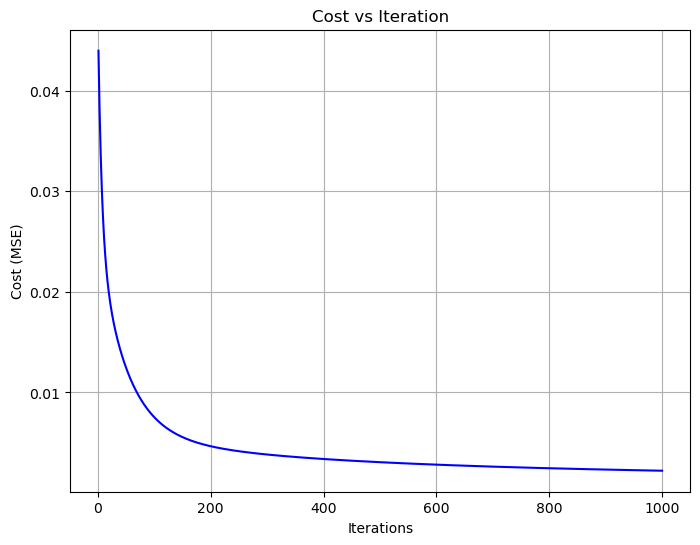

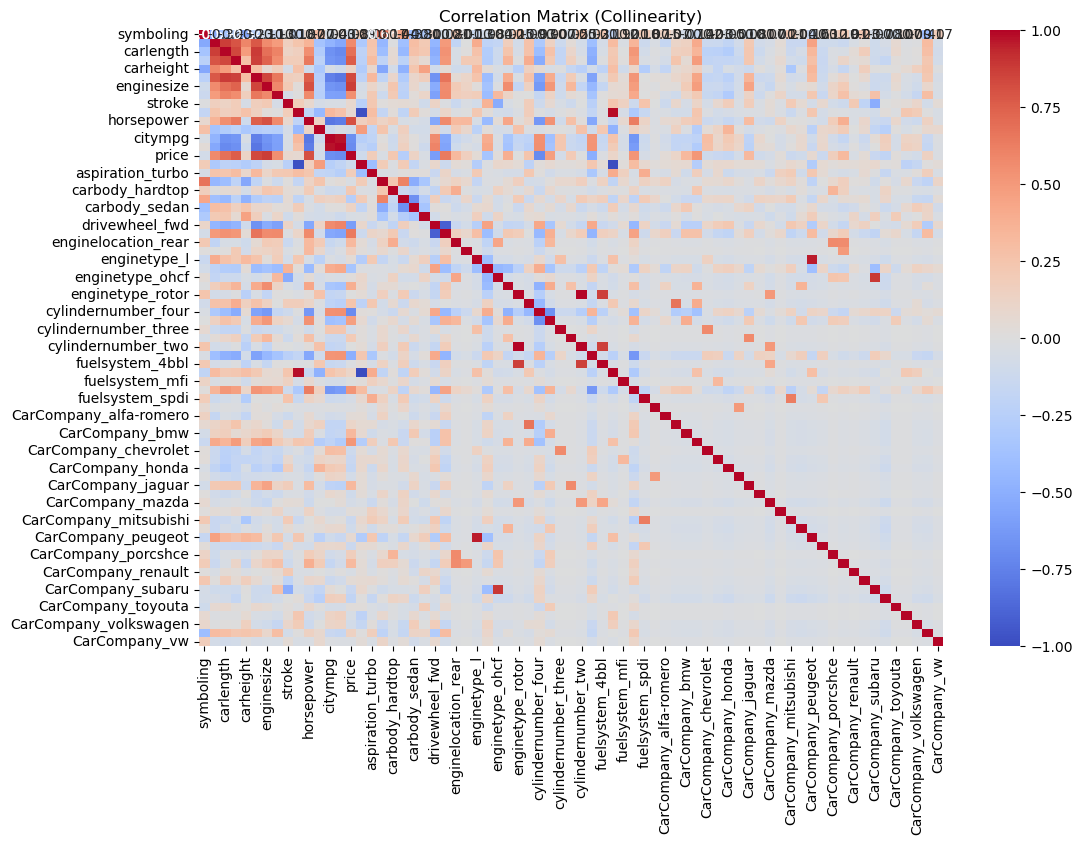

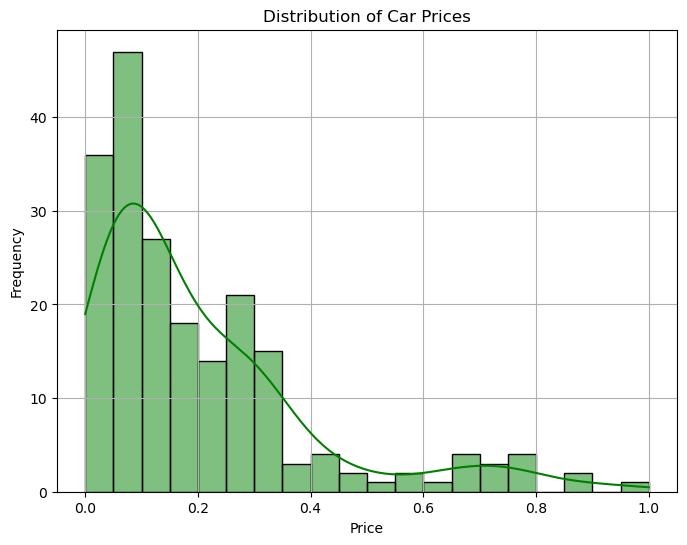

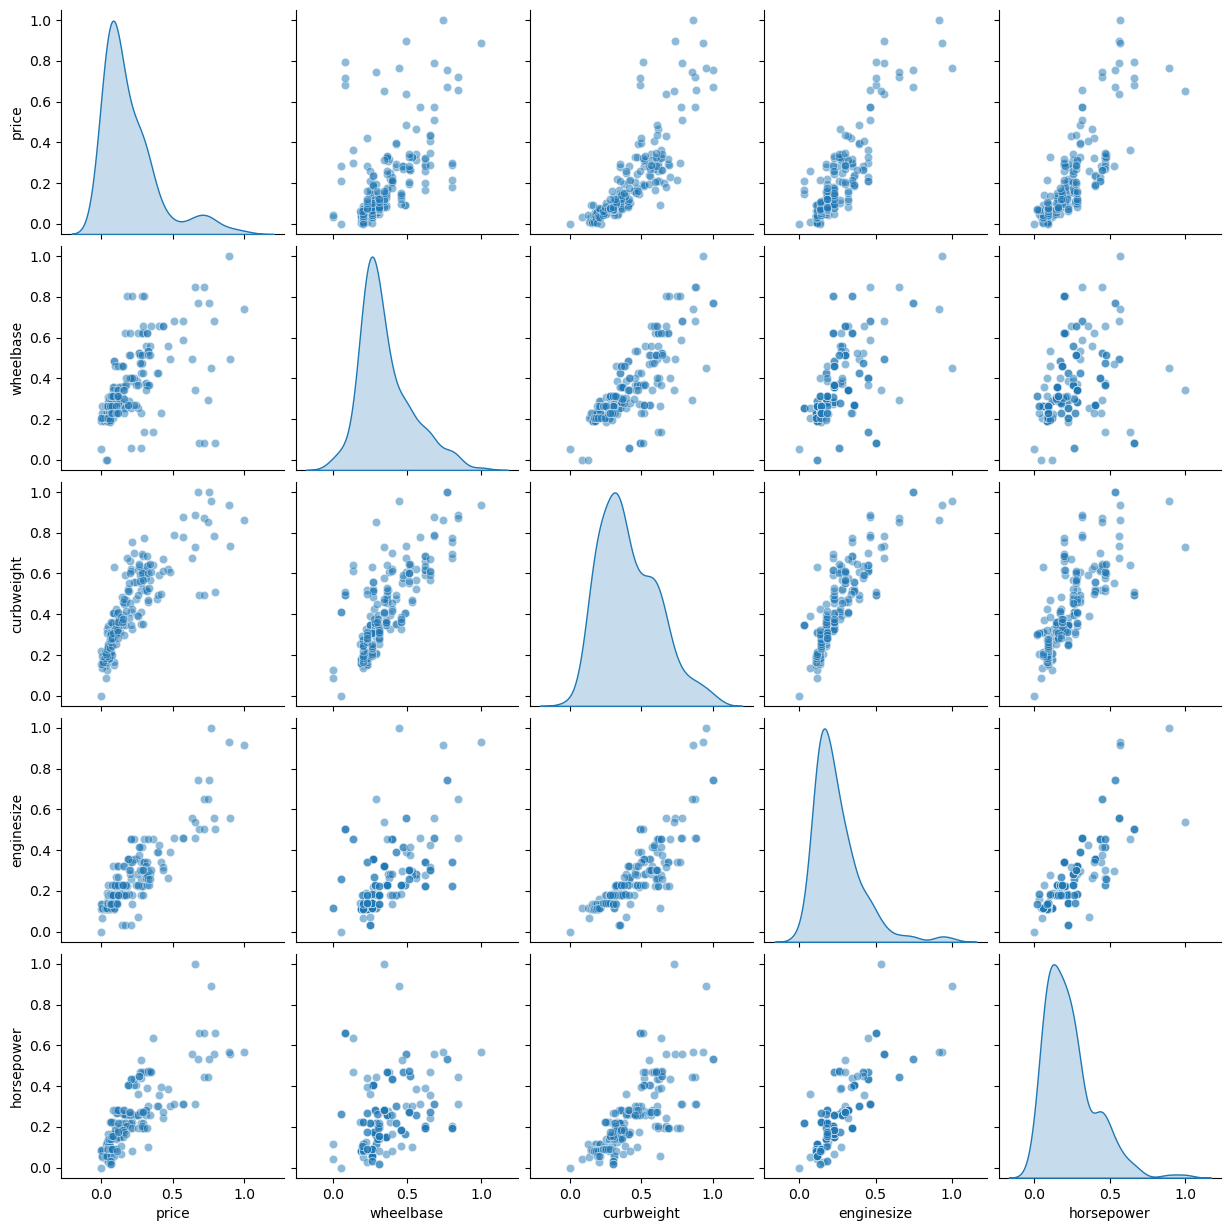

In [21]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the specific FutureWarning related to use_inf_as_na
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Load the dataset
df = pd.read_csv('car_prices.csv') 

# Replace inf values with NaN to avoid warnings
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 1. Handle Missing Values
df.dropna(inplace=True)

# 2. Extract the car manufacturer from 'CarName'
df['CarCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# 3. Drop unnecessary columns
df.drop(['CarName', 'car_ID'], axis=1, inplace=True)

# 4. One-Hot Encode Categorical Columns
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Feature Scaling (Manual) - Min-Max scaling
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

numerical_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
                  'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                  'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df[numerical_cols] = df[numerical_cols].apply(min_max_scaling)

# 6. Ensure X and y are numeric
X = df.drop('price', axis=1).astype(float)
y = df['price'].astype(float)

# 7. Manual Train-Test Split (80% train, 20% test)
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 8. Add bias (intercept) manually
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Gradient Descent for Linear Regression (with cost history tracking)
def gradient_descent_with_cost(X, y, alpha=0.01, iterations=1000, regularization=0):
    m = len(y)
    theta = np.zeros(X.shape[1])  # Initialize theta with zeros
    cost_history = []  # To store cost at each iteration

    for i in range(iterations):
        # Compute the prediction
        y_pred = X.dot(theta)
        # Calculate the gradient (with regularization term)
        gradient = (1/m) * X.T.dot(y_pred - y) + (regularization/m) * np.r_[0, theta[1:]]
        # Update theta
        theta -= alpha * gradient
        # Calculate cost (Mean Squared Error)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)
        cost_history.append(cost)
    
    return theta, cost_history

# Train the model using Gradient Descent with cost tracking
theta_gd, cost_history = gradient_descent_with_cost(X_train, y_train, alpha=0.01, iterations=1000, regularization=0)

# 9. Make Predictions
y_pred_train_gd = X_train.dot(theta_gd)
y_pred_test_gd = X_test.dot(theta_gd)

# 10. Evaluation (Mean Squared Error - MSE)
mse_train_gd = np.mean((y_pred_train_gd - y_train)**2)
mse_test_gd = np.mean((y_pred_test_gd - y_test)**2)

print(f"Training MSE with Gradient Descent: {mse_train_gd}")
print(f"Test MSE with Gradient Descent: {mse_test_gd}")

# 1. Plot Cost vs Iteration
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, color='blue')
plt.title('Cost vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

# 2. Plot Collinearity Matrix (Correlation Matrix)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Collinearity)')
plt.show()

# 3. Plot Distribution of the Target Variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=20, kde=True, color='green')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 4. Pair Plot to Visualize Relationships Between Features
sample_features = ['price', 'wheelbase', 'curbweight', 'enginesize', 'horsepower']
sns.pairplot(df[sample_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()


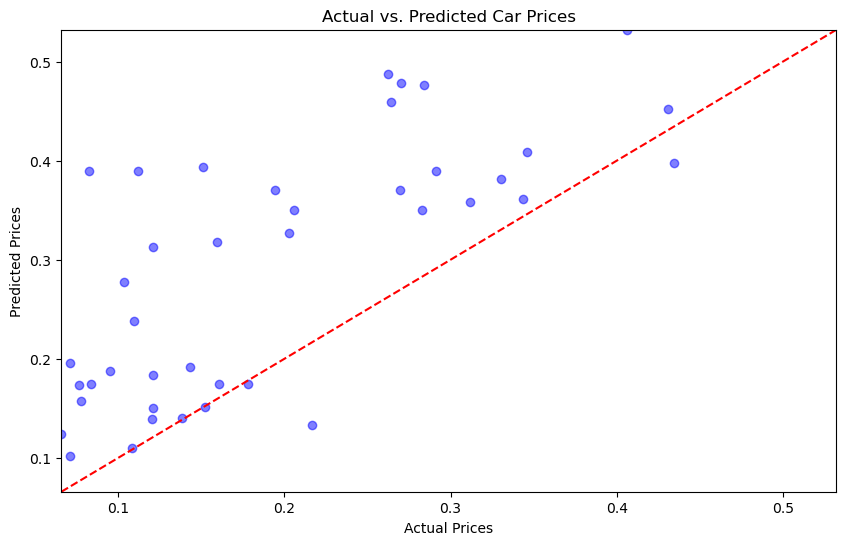

In [25]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual prices and y_pred_test contains predicted prices
y_pred_test = X_test.dot(theta_gd)  # Ensure you compute this if not already

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)

# Plot ideal prediction line (where actual = predicted)
min_price = min(min(y_test), min(y_pred_test))
max_price = max(max(y_test), max(y_pred_test))
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--')  # Ideal line

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Car Prices')

# Adjust limits based on actual and predicted price ranges
plt.xlim(min_price, max_price)
plt.ylim(min_price, max_price)

plt.show()


In [27]:
import numpy as np

# Function to calculate Z-scores
def calculate_z_scores(values):
    mean = np.mean(values)
    std_dev = np.std(values)
    z_scores = (values - mean) / std_dev
    return z_scores

# Assuming y_test contains actual prices and y_pred_test contains predicted prices
y_test_z_scores = calculate_z_scores(y_test)
y_pred_test_z_scores = calculate_z_scores(y_pred_test)

print("Z-scores for Actual Prices:\n", y_test_z_scores)
print("Z-scores for Predicted Prices:\n", y_pred_test_z_scores)


Z-scores for Actual Prices:
 164   -1.110908
165   -0.861025
166   -0.804448
167   -1.061167
168   -0.780639
169   -0.698130
170   -0.412887
171   -0.330379
172    1.112340
173   -0.943534
174   -0.530992
175   -0.698366
176   -0.483844
177   -0.401336
178    0.850434
179    0.718421
180    0.645814
181    0.659958
182   -1.220055
183   -1.172907
184   -1.168192
185   -1.121045
186   -1.050323
187   -0.814585
188   -0.696716
189   -0.319535
190   -0.700252
191    0.081220
192    0.210876
193   -0.155696
194   -0.002467
195    0.109509
196    0.715356
197    0.840298
198    1.289379
199    1.414320
200    0.918091
201    1.436715
202    2.011917
203    2.244119
204    2.280658
Name: price, dtype: float64
Z-scores for Predicted Prices:
 [-1.05946425 -0.10998188 -0.4236421   0.78124598  0.78033159  0.17573588
  0.81302103  0.21299727  0.53146881 -0.82205426 -1.20047442 -1.12099439
 -0.78622067 -1.1109361   1.47832294  1.49152437  1.56321755  1.34048048
 -1.32682835 -0.75732336 -1.50636245